In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
%matplotlib inline

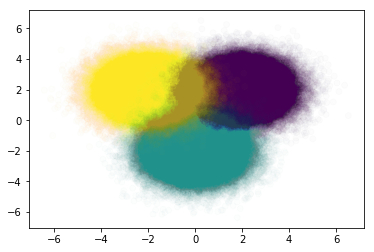

In [11]:
D = 2
K = 3
N = int(K*1e5)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0],X[:,1],c = y,alpha = 0.01)

In [12]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def shuffle(*args):
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward(X,W1,b1,W2,b2):
    Z = ReLU(np.matmul(X,W1) + b1)
    P_hat = softmax(np.matmul(Z,W2) + b2)
    return Z, P_hat

def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [13]:
Y = one_hot_encode(y)

In [14]:
M = 6

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

Runtime: 7 second(s)
Accuracy: 0.9691


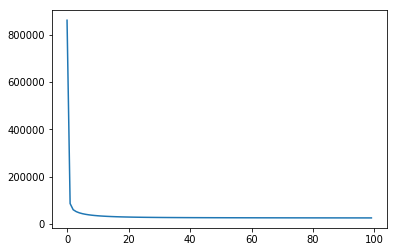

In [28]:
# Full Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_full = []
eta = 3e-6
epochs = int(100)

t0_full = dt.now()

for epoch in range(epochs):
    Z, P_hat = feed_forward(X,W1,b1,W2,b2)
    J_full.append(cross_entropy(Y,P_hat))
    
    dH2 = P_hat - Y
    dW2 = np.matmul(Z.T,dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z > 0)
    dW1 = np.matmul(X.T,dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)
    
run_full = (dt.now() - t0_full).seconds
    
plt.figure()
plt.plot(J_full)

y_hat = P_hat.argmax(axis = 1)

print("Runtime: {} second(s)".format(run_full))
print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

Runtime: 42 second(s)
Accuracy: 0.9703


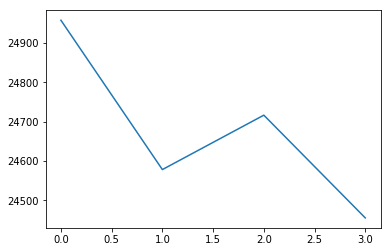

In [32]:
# Stochastic Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_stoch = []

eta = 1e-3
epochs = 3
check = 2e5
t = 0

t0_stoch = dt.now()

for epoch in range(epochs):
    X,Y,y = shuffle(X,Y,y)
    for i in range(N):
        X_b = X[[i],:]
        Y_b = Y[[i],:]
        
        t += 1
        
        Z_b, P_hat_b = feed_forward(X_b,W1,b1,W2,b2)
        
        dH2 = P_hat_b - Y_b
        dW2 = np.matmul(Z_b.T,dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z_b > 0)
        dW1 = np.matmul(X_b.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)
        
        if t % check == 0:
            Z, P_hat = feed_forward(X,W1,b1,W2,b2)
            J_stoch.append(cross_entropy(Y,P_hat))
        
run_stoch = (dt.now() - t0_stoch).seconds

plt.figure()
plt.plot(J_stoch)

P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
y_hat = P_hat.argmax(axis = 1)

print("Runtime: {} second(s)".format(run_stoch))
print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

Runtime: 1 second(s)
Accuracy: 0.9701


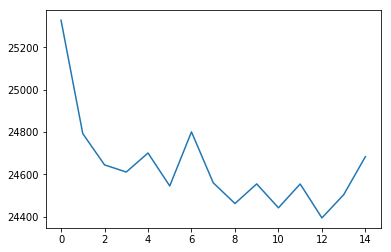

In [30]:
# Batch Gradient Descent

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_batch = []

eta = 1e-3
epochs = 5

t = 0

check = 1000
t0_batch = dt.now()

batch_sz = 100
batches = N//batch_sz

for epoch in range(epochs):
    X,Y,y = shuffle(X,Y,y)
    
    for batch in range(batches):
        X_b = X[(batch*batch_sz):((batch + 1)*batch_sz),:]
        Y_b = Y[(batch*batch_sz):((batch + 1)*batch_sz),:]
        
        t += 1
        
        Z_b, P_hat_b = feed_forward(X_b,W1,b1,W2,b2)
        
        dH2 = P_hat_b - Y_b
        dW2 = np.matmul(Z_b.T,dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z_b > 0)
        dW1 = np.matmul(X_b.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)
        
        if t % check == 0:
            Z, P_hat = feed_forward(X,W1,b1,W2,b2)
            J_batch.append(cross_entropy(Y,P_hat))
            
run_batch = (dt.now() - t0_batch).seconds

P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
y_hat = P_hat.argmax(axis = 1)

print("Runtime: {} second(s)".format(run_batch))
print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

plt.figure()
plt.plot(J_batch)

Runtime: 1 second(s)
Accuracy: 0.9702


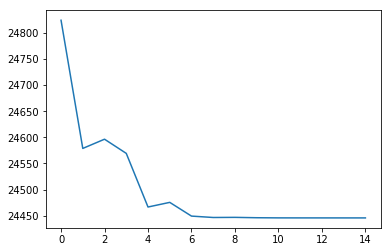

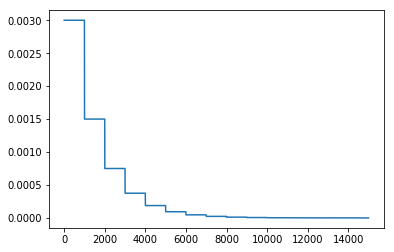

In [36]:
# Batch Gradient Descent w/ Scheduled Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_sch = []
lr_sch = []

eta0 = 3e-3
epochs = 5

k = 0.5
t = 0
T = 1000

check = 1000
t0_batch = dt.now()

batch_sz = 100
batches = N//batch_sz

for epoch in range(epochs):
    X,Y,y = shuffle(X,Y,y)
    
    for batch in range(batches):
        X_b = X[(batch*batch_sz):((batch + 1)*batch_sz),:]
        Y_b = Y[(batch*batch_sz):((batch + 1)*batch_sz),:]
        
        t += 1
        
        eta = eta0*k**(t//T)
        lr_sch.append(eta)
        
        Z_b, P_hat_b = feed_forward(X_b,W1,b1,W2,b2)
        
        dH2 = P_hat_b - Y_b
        dW2 = np.matmul(Z_b.T,dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z_b > 0)
        dW1 = np.matmul(X_b.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)
        
        if t % check == 0:
            Z, P_hat = feed_forward(X,W1,b1,W2,b2)
            J_sch.append(cross_entropy(Y,P_hat))
            
run_batch = (dt.now() - t0_batch).seconds

P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
y_hat = P_hat.argmax(axis = 1)

print("Runtime: {} second(s)".format(run_batch))
print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

plt.figure()
plt.plot(J_sch)

plt.figure()
plt.plot(lr_sch)

Runtime: 1 second(s)
Accuracy: 0.9702


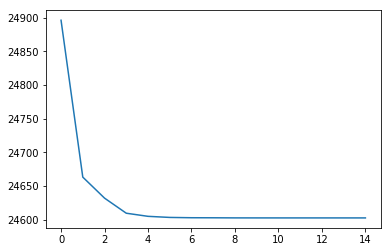

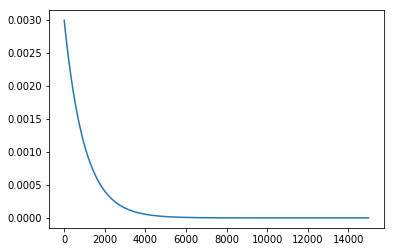

In [38]:
# Batch Gradient Descent w/ Exponential Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_exp = []
lr_exp = []

eta0 = 3e-3
epochs = 5

k = 1e-3
t = 0

check = 1000
t0_batch = dt.now()

batch_sz = 100
batches = N//batch_sz

for epoch in range(epochs):
    X,Y,y = shuffle(X,Y,y)
    
    for batch in range(batches):
        X_b = X[(batch*batch_sz):((batch + 1)*batch_sz),:]
        Y_b = Y[(batch*batch_sz):((batch + 1)*batch_sz),:]
        
        t += 1
        
        eta = eta0*np.exp(-k*t)
        lr_exp.append(eta)
        
        Z_b, P_hat_b = feed_forward(X_b,W1,b1,W2,b2)
        
        dH2 = P_hat_b - Y_b
        dW2 = np.matmul(Z_b.T,dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z_b > 0)
        dW1 = np.matmul(X_b.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)
        
        if t % check == 0:
            Z, P_hat = feed_forward(X,W1,b1,W2,b2)
            J_exp.append(cross_entropy(Y,P_hat))
            
run_batch = (dt.now() - t0_batch).seconds

P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
y_hat = P_hat.argmax(axis = 1)

print("Runtime: {} second(s)".format(run_batch))
print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

plt.figure()
plt.plot(J_exp)

plt.figure()
plt.plot(lr_exp)

Runtime: 1 second(s)
Accuracy: 0.9697


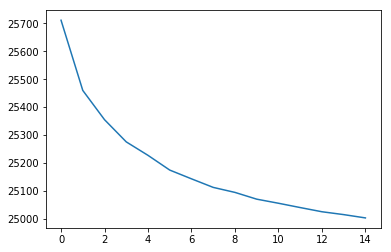

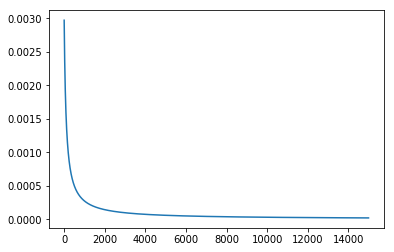

In [40]:
# Batch Gradient Descent w/ Inverse Decay

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_inv = []
lr_inv = []

eta0 = 3e-3
epochs = 5

k = 1e-2
t = 0

check = 1000
t0_batch = dt.now()

batch_sz = 100
batches = N//batch_sz

for epoch in range(epochs):
    X,Y,y = shuffle(X,Y,y)
    
    for batch in range(batches):
        X_b = X[(batch*batch_sz):((batch + 1)*batch_sz),:]
        Y_b = Y[(batch*batch_sz):((batch + 1)*batch_sz),:]
        
        t += 1
        
        eta = eta0/(k*t + 1)
        lr_inv.append(eta)
        
        Z_b, P_hat_b = feed_forward(X_b,W1,b1,W2,b2)
        
        dH2 = P_hat_b - Y_b
        dW2 = np.matmul(Z_b.T,dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2,W2.T)
        dH1 = dZ1*(Z_b > 0)
        dW1 = np.matmul(X_b.T,dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)
        
        if t % check == 0:
            Z, P_hat = feed_forward(X,W1,b1,W2,b2)
            J_inv.append(cross_entropy(Y,P_hat))
            
run_batch = (dt.now() - t0_batch).seconds

P_hat = feed_forward(X,W1,b1,W2,b2)[-1]
y_hat = P_hat.argmax(axis = 1)

print("Runtime: {} second(s)".format(run_batch))
print("Accuracy: {:0.4f}".format(accuracy(y,y_hat)))

plt.figure()
plt.plot(J_inv)

plt.figure()
plt.plot(lr_inv)